In [57]:
import tensorflow as tf
import keras as ks

In [58]:
import pandas as pd 

In [59]:
import numpy as np 

In [60]:
import matplotlib.pyplot as plt

In [61]:
datafile = pd.read_csv("AAPL.csv")
print(datafile.shape)
datafile.head()

(250, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-04,174.570007,178.490005,174.440002,178.440002,177.365570,76468400
1,2022-04-05,177.500000,178.300003,174.419998,175.059998,174.005920,73401800
2,2022-04-06,172.360001,173.630005,170.130005,171.830002,170.795380,89058800
3,2022-04-07,171.160004,173.360001,169.850006,172.139999,171.103516,77594700
4,2022-04-08,171.779999,171.779999,169.199997,170.089996,169.065842,76575500


In [62]:
training_set = datafile.iloc[:,1:2]
training_set.head()


,Open
0,174.570007
1,177.500000
2,172.360001
3,171.160004
4,171.779999


In [63]:
#scalining the data
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range =(0,1)) 
scaler.fit(training_set)
#Compute the minimum and maximum to be used for later scaling
scaled_training_set = scaler.transform(training_set)

In [64]:
X_train = []
y_train = []
for i in range (13, 250):
    X_train.append(scaled_training_set[i-13:i,0])
    y_train.append(scaled_training_set[i,0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print(X_train.shape)


(237, 13)
(237,)
(237, 13, 1)


In [65]:
from keras import models
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [66]:
#Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM
regressor = Sequential() 

regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1) ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


#each LSTM layer has 50 units, after which dropout of 0.2, helps the model from memoring too much -> overfitting
#Dense layer with one unit of output, the output unit it the predicted numerical value 

In [67]:
#fitting the model 

regressor.compile(optimizer="adam", loss="mean_squared_error")
#sets up the model with an optimizer and a loss function, which are used during training
regressor.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 6s 25ms/step - loss: 0.1239
Epoch 2/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0375
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0325
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0281
Epoch 5/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0238
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0243
Epoch 7/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0229
Epoch 8/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0216
Epoch 9/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0242
Epoch 10/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0220
Epoch 11/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0228
Epoch 12/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0228
Epoch 13/100
8/8 [==============================]

In [68]:
#Extracting the Actual Stock Prices of March-2023
dataset_test = pd.read_csv("AAPL_test.csv")
actual_stock_price = dataset_test.iloc[:,1:2]
actual_stock_price.head()

,Open
0,148.899994
1,148.029999
2,152.570007
3,150.639999
4,153.880005


In [69]:
#prepares the test data for a time series prediction model
dataset_total = pd.concat((datafile['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-13:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test =[]
for i in range(13, len(inputs)):
    X_test.append(inputs[i-13:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

/opt/anaconda3/envs/kerasenv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [70]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 8ms/step


<function matplotlib.pyplot.legend(*args, **kwargs)>

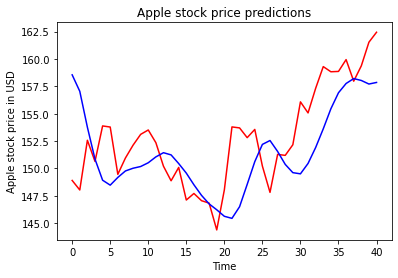

In [71]:
plt.plot(actual_stock_price, color ="red", label= "actual stock price")
plt.plot(predicted_stock_price, color= "blue", label="predicted stock price")
plt.title("Apple stock price predictions")
plt.xlabel('Time')
plt.ylabel('Apple stock price in USD')
plt.legend

In [72]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
print('Root Mean Squared Error:', rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
print("Mean Squared Error (MSE):", mse)

Root Mean Squared Error: 3.9599550828236185
Mean Absolute Error (MAE): 3.074715599299734
Mean Squared Error (MSE): 15.68124425798061
